# Exploring the Sparse Construction of the GNN

In [13]:
import os
import sys

import torch
from matplotlib import pyplot as plt
import numpy as np

## Load Data

In [5]:
input_dir = "/project/projectdirs/m3443/data/ITk-upgrade/processed/filter_processed/1_GeV_unweighted_high_eff/train"
all_files = os.listdir(input_dir)
all_events = [os.path.join(input_dir, file) for file in all_files]

In [9]:
sample_id = 0
sample = torch.load(all_events[0], map_location="cpu")

In [10]:
sample

Data(cell_data=[330188, 11], edge_index=[2, 1466259], event_file="/project/projectdirs/m3443/data/ITk-upgrade/processed/full_events_v3/event000002097", hid=[330188], modulewise_true_edges=[2, 15096], nhits=[330188], pid=[330188], primary=[330188], pt=[330188], x=[330188, 3], y=[1466259], y_pid=[1466259])

## Explore Event

- Plot true (signal) edges
- Plot true (signal) on fake edges
- Plot signal on background on fake edges

In [11]:
sample.x

tensor([[ 0.0375, -0.8439, -0.2630],
        [ 0.0536, -0.9314, -0.2630],
        [ 0.0516, -0.8724, -0.2630],
        ...,
        [ 0.9410, -0.0409,  2.8542],
        [ 0.9656, -0.0581,  2.8542],
        [ 0.9144, -0.0578,  2.8542]])

In [14]:
r, phi, z = sample.x.T
x, y = r*np.cos(phi*np.pi)*1000, r*np.sin(phi*np.pi)*1000
z = z*1000

In [39]:
phi_mask = (0.5 < phi) & (phi < 1)

In [40]:
phi.shape, phi_mask.sum()

(torch.Size([330188]), tensor(82369))

(Text(0.5, 1.0, 'Down-beampipe Spacepoint Distribution'),
 Text(0.5, 0, 'x direction (mm)'),
 Text(0, 0.5, 'y direction (mm)'))

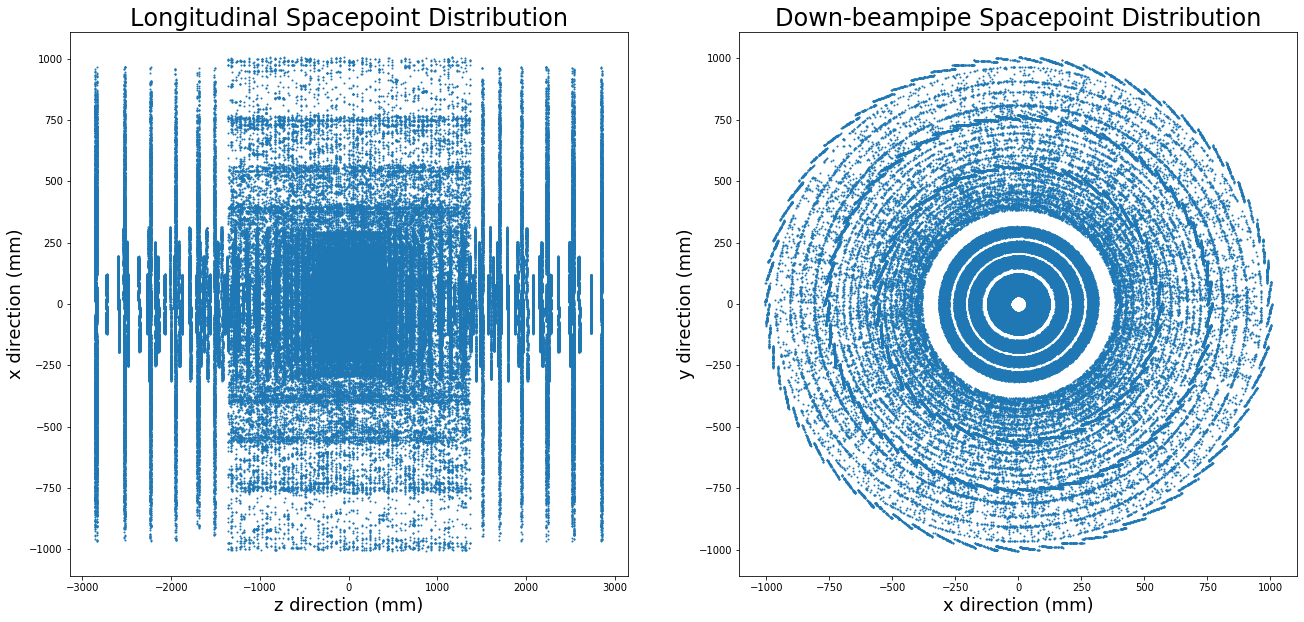

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(22,10))
axs[0].scatter(z, x, s=1)
axs[1].scatter(x, y, s=1)
axs[0].set_title("Longitudinal Spacepoint Distribution", fontsize=24), axs[0].set_xlabel("z direction (mm)", fontsize=18), axs[0].set_ylabel("x direction (mm)", fontsize=18)
axs[1].set_title("Down-beampipe Spacepoint Distribution", fontsize=24), axs[1].set_xlabel("x direction (mm)", fontsize=18), axs[1].set_ylabel("y direction (mm)", fontsize=18)

In [55]:
signal_e = sample.modulewise_true_edges
positive_signal_e = sample.edge_index[:, sample.y == 1]
fake_e = sample.edge_index[:, sample.y == 0]
background_e = fake_e[:, (sample.pid[fake_e[0]] == sample.pid[fake_e[1]]) & (sample.pid[fake_e[0]] != 0)]

In [56]:
signal_e = signal_e[:, phi_mask[signal_e[0]]]
positive_signal_e = positive_signal_e[:, phi_mask[positive_signal_e[0]]]
fake_e = fake_e[:, phi_mask[fake_e[0]]]
background_e = background_e[:, phi_mask[background_e[0]]]

In [57]:
signal_e.shape, positive_signal_e.shape, fake_e.shape, background_e.shape

(torch.Size([2, 3559]),
 torch.Size([2, 3402]),
 torch.Size([2, 359184]),
 torch.Size([2, 29416]))

CPU times: user 26.1 s, sys: 1.02 s, total: 27.1 s
Wall time: 27 s


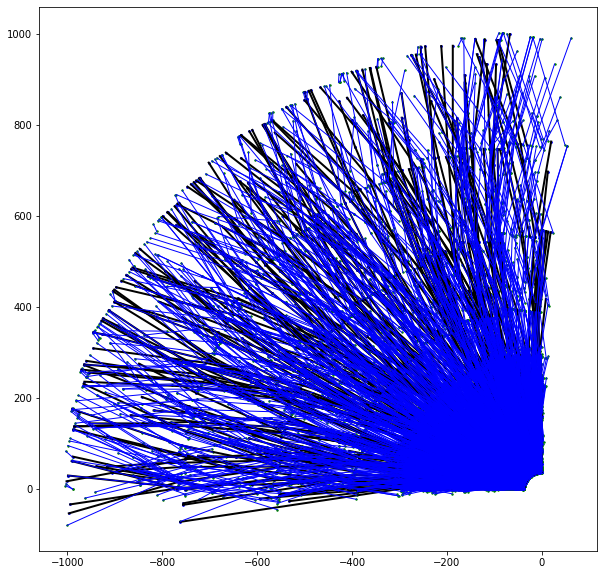

In [52]:
%%time
fig = plt.figure(figsize=(10,10))
plt.plot(x[signal_e], y[signal_e], linewidth=2, c="k");
plt.plot(x[background_e], y[background_e], linewidth=1, c="b");
plt.scatter(x[background_e], y[background_e], s=2, c="g")
plt.scatter(x[signal_e], y[signal_e], s=3, c="b")

CPU times: user 13.1 s, sys: 388 ms, total: 13.5 s
Wall time: 13.5 s


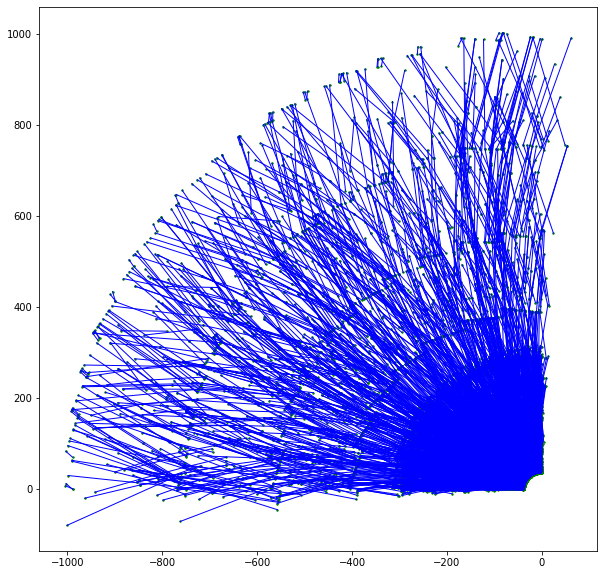

In [53]:
%%time
fig = plt.figure(figsize=(10,10))
# plt.plot(x[signal_e], y[signal_e], linewidth=2, c="k");
plt.plot(x[background_e], y[background_e], linewidth=1, c="b");
plt.scatter(x[background_e], y[background_e], s=2, c="g")
# plt.scatter(x[signal_e], y[signal_e], s=3, c="b")

CPU times: user 1.62 s, sys: 19.8 ms, total: 1.64 s
Wall time: 1.63 s


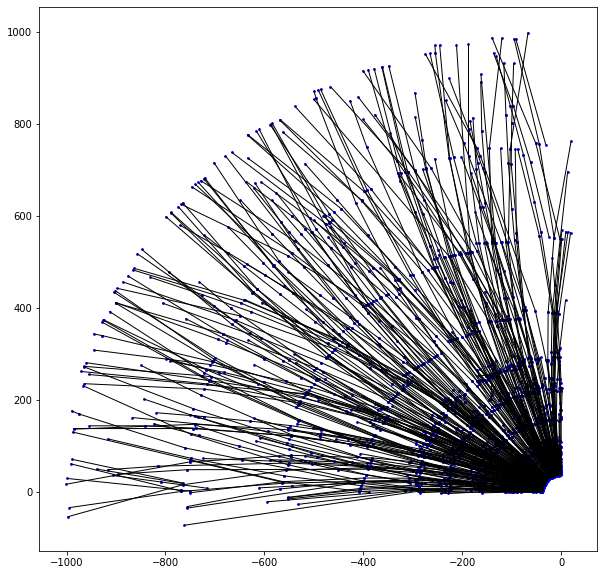

In [51]:
%%time
fig = plt.figure(figsize=(10,10))
plt.plot(x[signal_e], y[signal_e], linewidth=1, c="k");
# plt.plot(x[background_e], y[background_e], linewidth=1, c="r");
# plt.scatter(x[background_e], y[background_e], s=2, c="g")
plt.scatter(x[signal_e], y[signal_e], s=3, c="b")

CPU times: user 1.54 s, sys: 35.8 ms, total: 1.57 s
Wall time: 1.57 s


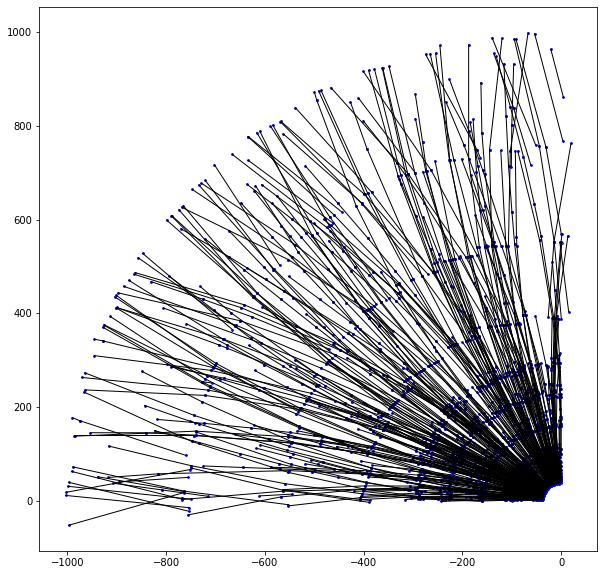

In [58]:
%%time
fig = plt.figure(figsize=(10,10))
plt.plot(x[positive_signal_e], y[positive_signal_e], linewidth=1, c="k");
# plt.plot(x[background_e], y[background_e], linewidth=1, c="r");
# plt.scatter(x[background_e], y[background_e], s=2, c="g")
plt.scatter(x[positive_signal_e], y[positive_signal_e], s=3, c="b")